# Logistic Regression 

Fitting a line using linear regression 

    Y ~ sigmoid(wX) -> f(x)  

where f is a non-linear function of x. 

Solve for w and b. 

Sigmoid function is a non-linear function that squashes its values between 0 and 1: 
        
        f(x) = 1/(1+e^-x)


Cost Function: minimizing the loss between ground truth Y and predictions f(x) over all the samples. 

Loss can be L2 or L1 norm (to encourage sparsity) 

Cost Function = 
                
                sum over samples loss(Y_i , f(x_i)) = 

                sum((f(x_i) - y_i))^2 => Normalized
                
                1/(2 * m) sum((f(x_i) - y_i)^2) , where m is the number of samples 
                
To find w and b the cost function is minimized in a closed form or using gradient descent algorithm. Linear regression solves a convex function, local minimum is a global maximum. 

Parameters of the model are updated simultaneously. 

    temp_w = w - alpha * d/dw(cost function)

    w = temp_w


d/dw(cost function) is the derivative of the cost function with respect to w and alpha is the learning rate. 

Deriviate of the sigmoid function:

    d/dx(sigmoid(x)) = sigmoid(x)(1-sigmoid(x))
    
Consider the cost function to be the norm 2 and Y = wX + b , 

    J(w) = 1/(2 * m) * sum((sigmoid(w * X_i) -Y_i)^2 )
    
So far, the logistic regression cost function is not convex, to make it convex the log function is applied to the cost function. 

        Log(J(w,b)) = 1/(2 * m) * sum((-Y_i * log(f(X_i))) - ((1-Y_i) * log(f(X_i)-1)))

dJ/dw = 

        1 / m * sum( (sigmoid(w * X_i + b) - Y_i)  * X_i ) 
        
Gradient descent is then, 

    W = W - alpha * dJ/dw

Gradient descent can be ran until the number of iterations is reached, or the cost function goes below a threshold, or perhaps, the change in cost function is minimum, i.e., model isn't learning. 

Instead of using for loops, we can employ numpy to vectorize the implementations. 

    Y = sigmoid( np.dot(w,X))

And cost function is also a function of X and Y as vectors, instead of a a list of samples. 

If Y was a function multiple features our implementation of linear regression simply generalizes by performing gradident descent with respect to each feature. 

    W_1 = W_1 - alpha * dJ/dw_1

    W_2 = W_2 - alpha * dJ/dw_2

The cost function can also be regularized using norm 2 or norm 1, this will further update the gradient descent. 

    J(w) = 1/(2 * m) * sum((-Y_i * log(f(X_i))) - ((1-Y_i) * log(f(X_i)-1))) + gamma/2 * sum(w^2)

    dJ/dw = 1 / m * sum( (sigmoid(w * X_i + b) - Y_i)  * X_i )  + gamma* sum(w)

Where gamma is the regularization factor. 

Logistic regression is a classification algorithm with a linear decision boundary. 

In [400]:
import numpy as np 
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris


In [753]:
class LogisticRegression():
    
    def __init__(self, iteration= 50, learning_rate=0.01, threshold = 0.01, gamma = 0.001, num_labels = 1):
        self.iter_ = iteration
        self.lr = learning_rate
        self.thr = threshold
        self.gamma = gamma
        self.costs = []
        self.num_labels = num_labels
        
    def fit(self, X, Y, W):
        m,k = X.shape
        X = X.reshape(m,k)
        
        Y_hot = self.onehot(Y)
        
        for i in range(self.iter_):
            y_pred = self.sigmoid(np.dot(X , W))
            loss = (y_pred - Y_hot)/3
            w_error = np.dot(X.T, loss)
            update_w = self.lr * 1/m * w_error + (self.gamma * sum(W))
            W = W - update_w
            if i >2 : # skipping the first two iterations 
                cost = self.cost_function(Y_hot,X,W)
                self.costs.append(cost)
                if cost < self.thr:
                    break
            
        return W
    
    def cost_function(self,Y,X,W):
        m = len(Y)
        y_pred = self.sigmoid(np.dot(X , W))
        loss = (Y * np.log(y_pred)) + ((1 - Y) * np.log(1 - y_pred))
        loss = np.sum(loss,axis=1)/self.num_labels
        return -1 /m * sum(loss)

    def sigmoid(self, x ):
        return 1/(1 + np.exp(-x))
        
    def onehot(self, Y):
        Y = Y.reshape(m,1)
        min_, max_ = np.min(Y), np.max(Y)
        labels = []
        for i in range(min_,max_+1):
            labels.append(np.int32(Y == i))

        labels = np.array(labels).squeeze()
        return labels.T

In [754]:
X, Y = load_iris(return_X_y=True)

num_feats = 2
num_labels = 3

X = X[:,2:num_feats+2].reshape(len(X),num_feats)


median = np.median(X,axis=0)
std = np.std(X,axis=0)
X = (X- median)/std

X = np.append(np.ones((len(X), 1)), X, axis=1) #include intercept

m, num_feats = X.shape


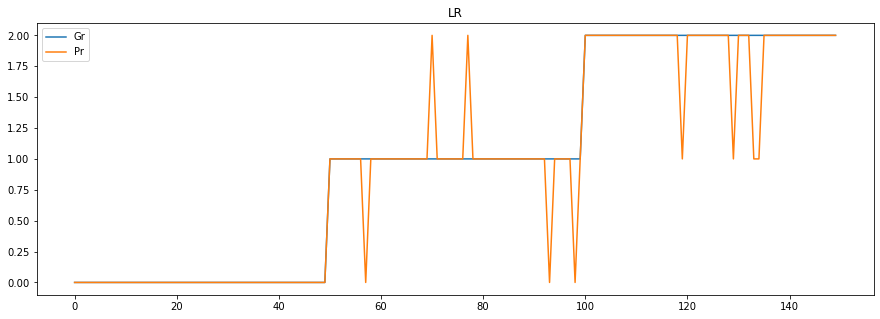

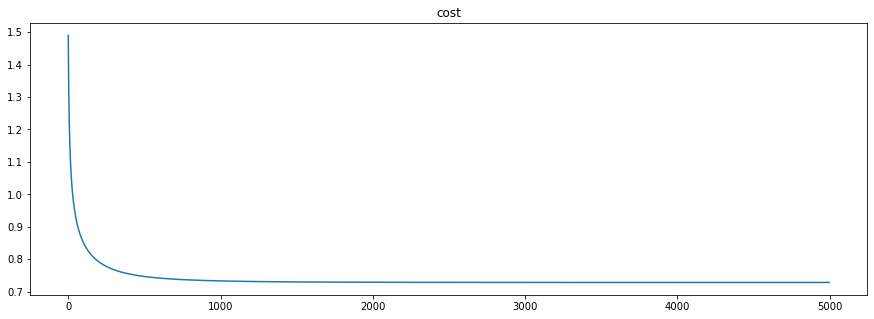

In [755]:
LLReg = LogisticRegression(iteration=5000,learning_rate=1)
w = np.random.randn(num_feats,num_labels)/10

W = LLReg.fit(X,Y,w)

X2 = X.reshape(m,num_feats)
z = LLReg.sigmoid(np.dot(X2 , W)).squeeze()


plt.figure(figsize=(15,5))
plt.plot(Y)
plt.plot(np.argmax(z,axis=1))
plt.legend(['Gr','Pr'])
plt.title('LR')
plt.show()

plt.figure(figsize=(15,5))
plt.plot(LLReg.costs)
plt.title('cost')
plt.show()


# Decision Boundary 

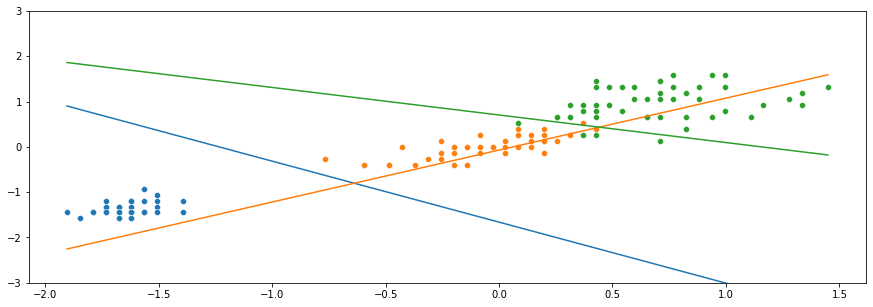

In [756]:
plt.figure(figsize = (15,5))
ax = sns.scatterplot(x = X[Y==0,1],y = X[Y==0,2])
ax =sns.scatterplot(x=X[Y==1,1],y=X[Y==1,2])
ax =sns.scatterplot(x = X[Y==2,1],y = X[Y==2,2])

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
for i in range(num_labels):
    y_boundary = -(W[0][i] + W[1][i] * x_boundary) / W[2][i]
    ax = sns.lineplot(x = x_boundary, y = y_boundary)
    
ax.set(ylim=(-3, 3))
plt.show();
